In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def wrangle(file):
    #Read csv file
    df = pd.read_csv(file)
    
    # Fill missing values in the 'Age' column with the median age
    df["Age"] = df["Age"].fillna(df["Age"].median()).astype(int)
    
    # Fill missing values in the 'Cabin' column with the most frequent value
    df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[2])
    
    #Fill missing values in the 'Embarked' column with the most common embarkation point
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    #Set the passengerID to index
    df= df.set_index(df["PassengerId"]).sort_index(ascending=True)
    df.drop(columns="PassengerId", inplace=True)

    return df

In [3]:
df = wrangle("train.csv")
print(df.shape)
df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,G6,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,G6,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,G6,S


In [4]:
# Get an overview of the data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,G6,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,G6,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,G6,S


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Total Number of Passengers
print("Total Number of Passenger:",len(df))
print("Total Number of Male Passeneger:",df[df["Sex"]=="male"].value_counts().sum())
print("Total Number of Female Passeneger:", df[df["Sex"]=="female"].value_counts().sum())

Total Number of Passenger: 891
Total Number of Male Passeneger: 577
Total Number of Female Passeneger: 314


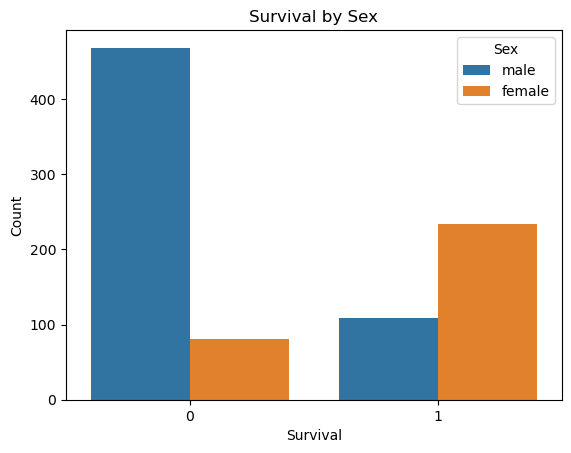

In [6]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.xlabel("Survival")
plt.ylabel("Count")
plt.show()

In [7]:
#Create a datframe for the survived passengers
survived_passengers = df[df['Survived'] == 1][["Sex","Age", "Pclass", "Embarked"]]
survived_passengers = pd.DataFrame(survived_passengers)
survived_passengers.head(10)

,Sex,Age,Pclass,Embarked
PassengerId,,,,
2,female,38,1,C
3,female,26,3,S
4,female,35,1,S
9,female,27,3,S
10,female,14,2,C
11,female,4,3,S
12,female,58,1,S
16,female,55,2,S
18,male,28,2,S


Number of Passengers who survived: 342
Number of Passengers who didn't survive: 549


,count
Sex,
female,233
male,109


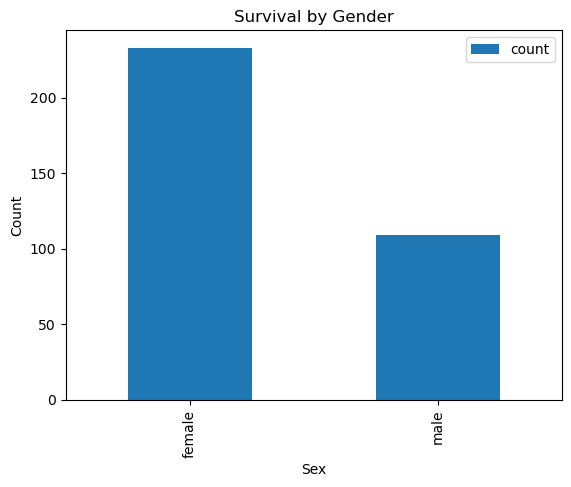

In [21]:
print(f"Number of Passengers who survived: {df.Survived.value_counts()[1]}")
print(f"Number of Passengers who didn't survive: {df.Survived.value_counts()[0]}")
sex = survived_passengers["Sex"].value_counts().to_frame()
sex.plot(kind="bar")
plt.title('Survival by Gender')
plt.xlabel("Sex")
plt.ylabel("Count");
survived_passengers["Sex"].value_counts().to_frame()

In [51]:
print("Total Number of Passengers in the First Class:",df[df["Pclass"] == 1].value_counts().sum(), "Passengers")
print("Total Number of Passengers in the Second Class:",df[df["Pclass"] == 2].value_counts().sum(), "Passengers")
print("Total Number of Passengers in the Third Class:",df[df["Pclass"] == 3].value_counts().sum(), "Passengers")

Total Number of Passengers in the First Class: 216 Passengers
Total Number of Passengers in the Second Class: 184 Passengers
Total Number of Passengers in the Third Class: 491 Passengers


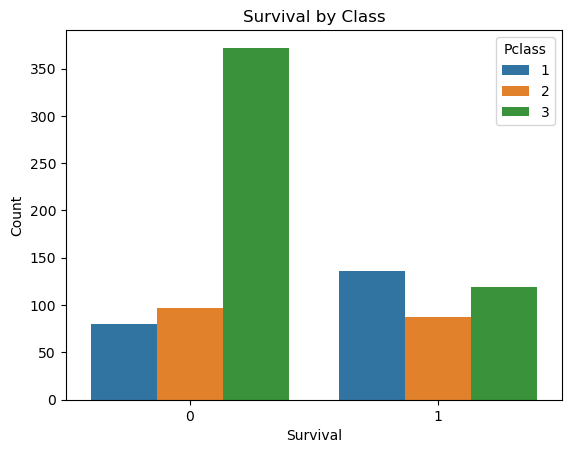

In [23]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Class')
plt.xlabel("Survival")
plt.ylabel("Count");
plt.show()

Total Number of Survivors in First Class: 136 Passengers
Total Number of Survivors in Second Class: 87 Passengers
Total Number of Survivors in Thrid Class: 119 Passengers


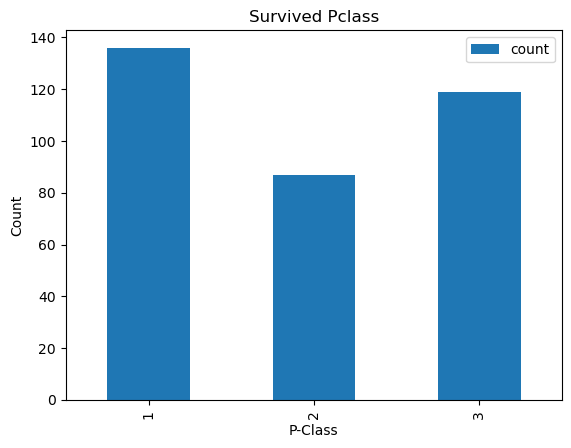

In [32]:
pclass1 = (survived_passengers[survived_passengers["Pclass"] == 1]["Sex"].value_counts().sum())
print(f"Total Number of Survivors in First Class: {pclass1} Passengers")
pclass2 = (survived_passengers[survived_passengers["Pclass"] == 2]["Sex"].value_counts().sum())
print(f"Total Number of Survivors in Second Class: {pclass2} Passengers")
pclass3 = (survived_passengers[survived_passengers["Pclass"] == 3]["Sex"].value_counts().sum())
print(f"Total Number of Survivors in Thrid Class: {pclass3} Passengers")

pclass = survived_passengers["Pclass"].value_counts().to_frame().sort_index()
pclass.plot(kind="bar")
plt.title('Survived Pclass')
plt.xlabel("P-Class")
plt.ylabel("Count");

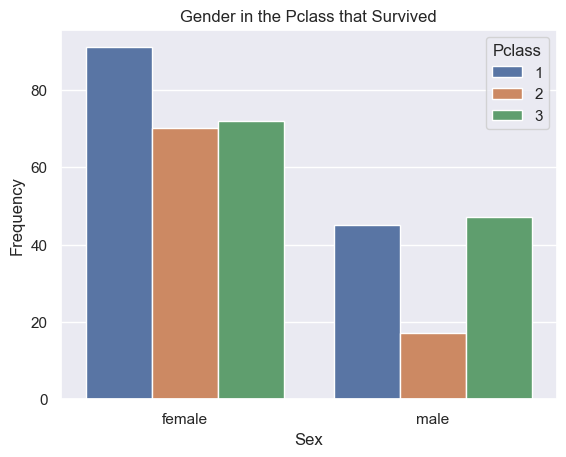

count
Pclass Sex          
1      female     91
       male       45
2      female     70
       male       17
3      female     72
       male       47

In [311]:
sns.countplot(x='Sex', hue='Pclass', data=survived_passengers)
plt.title('Gender in the Pclass that Survived')
plt.ylabel("Frequency")
plt.show()

survived_passengers[["Pclass", "Sex"]].value_counts().to_frame().sort_index()

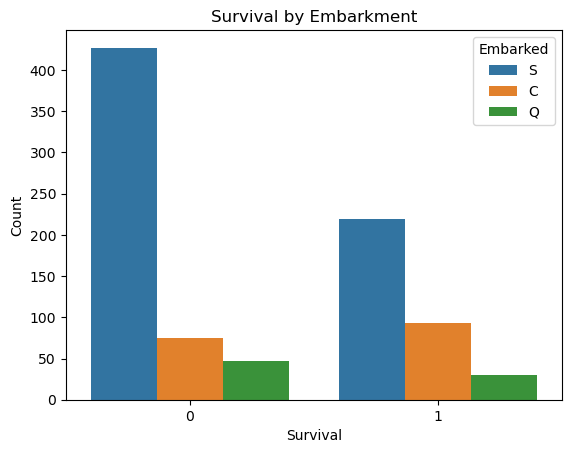

In [38]:
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival by Embarkment')
plt.xlabel("Survival")
plt.ylabel("Count");

,count
Embarked,
Q,30
C,93
S,219


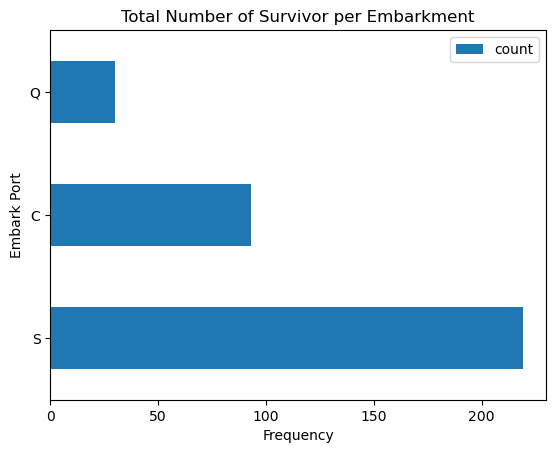

In [63]:
embark = survived_passengers["Embarked"].value_counts().to_frame()
embark.plot(kind="barh")
plt.title('Total Number of Survivor per Embarkment')
plt.xlabel("Frequency")
plt.ylabel("Embark Port")
survived_passengers["Embarked"].value_counts().to_frame().sort_values(by="count")

In [70]:
survived_passengers[["Embarked", "Pclass", "Sex"]].value_counts().to_frame().sort_index()

count
Embarked Pclass Sex          
C        1      female     42
                male       17
         2      female      7
                male        2
         3      female     15
                male       10
Q        1      female      1
         2      female      2
         3      female     24
                male        3
S        1      female     48
                male       28
         2      female     61
                male       15
         3      female     33
                male       34

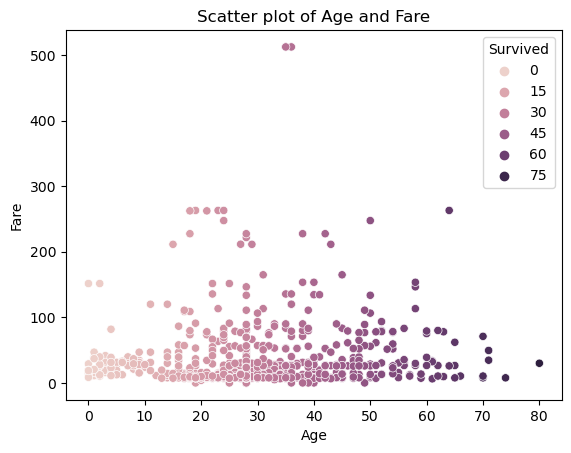

In [41]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Age")
plt.title("Scatter plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived");

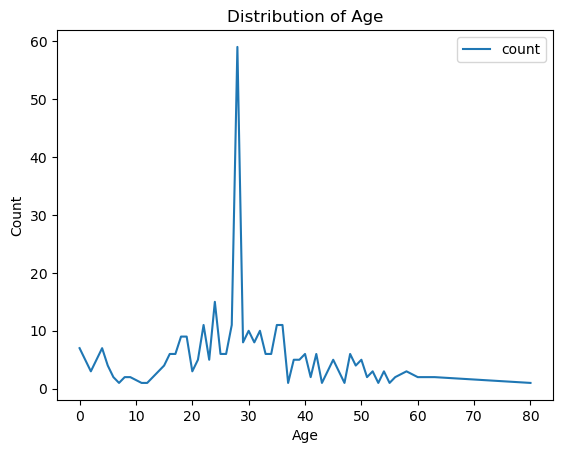

In [59]:
survived_passengers["Age"].value_counts().sort_index().to_frame().plot()
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count");